<a href="https://colab.research.google.com/github/jiw3026/analy/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%95%B4%EB%B3%B8_%EA%B2%83_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/신빅해-신박해커톤/preprocessing.csv')
df_original = pd.read_csv('/content/drive/Shareddrives/신빅해-신박해커톤/data_045.csv', encoding='euc-kr')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df['축산업'] = df_original['B25']
import numpy as np
df['숙박업'] = np.log1p(df['숙박업'])
df['여행업'] = np.log1p(df['여행업'])
df['세금'] = np.log1p(df['세금'])
df['잡화및쇼핑'] = np.log1p(df['잡화및쇼핑'])
df['농수산물'] = np.log1p(df['농수산물'])
df['결제대행'] = np.log1p(df['결제대행'])
df['요식업'] = np.log1p(df['요식업'])
df['가구/전자제품'] = np.log1p(df['가구/전자제품'])
df['중고품 판매점'] = np.log1p(df['중고품 판매점'])
df['사무/통신기기'] = np.log1p(df['사무/통신기기'])
df['통신요금'] = np.log1p(df['통신요금'])
df['의류'] = np.log1p(df['의류'])
df['귀금속/악세서리'] = np.log1p(df['귀금속/악세서리'])
df['취미/문화'] = np.log1p(df['취미/문화'])
df['학업'] = np.log1p(df['학업'])
df['보험'] = np.log1p(df['보험'])
df['장례업'] = np.log1p(df['장례업'])
df['법률업'] = np.log1p(df['법률업'])
df['오락'] = np.log1p(df['오락'])
df['의료'] = np.log1p(df['의료'])
df['제조업'] = np.log1p(df['제조업'])
df['자동차'] = np.log1p(df['자동차'])
df['축산업'] = np.log1p(df['축산업'])
df['자동차유지비'] = np.log1p(df['자동차유지비'])
df['연료/가스비'] = np.log1p(df['연료/가스비'])
df['수제용품점'] = np.log1p(df['수제용품점'])
df['기타'] = np.log1p(df['기타'])
df['자전거'] = np.log1p(df['자전거'])

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import StrMethodFormatter,FormatStrFormatter

In [ ]:
df2 = df.drop(columns=['E1','E2'])
df2['green_score'] = (df2['수제용품점']+df2['자전거'] +df2['중고품 판매점']) - (df2['자동차']+df2['연료/가스비']+df2['축산업'])

In [ ]:
# 비교 양수 쪽에서 하기 위해 전체적으로 min 값 더하기
df2['green_score_cmp'] = df2['green_score']+abs(df2['green_score'].min())

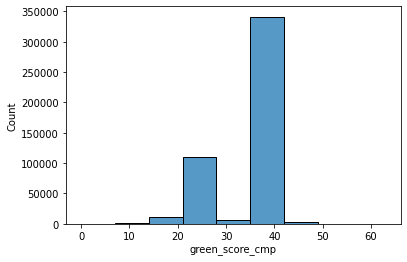

In [ ]:
sns.histplot(df2['green_score_cmp'], binwidth=7)

In [ ]:
data_train_T=df2['green_score_cmp']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 20:
        target.append(1)
    elif data_train_T.iloc[i] < 30:
        target.append(2)
    elif data_train_T.iloc[i] < 45:
        target.append(3)
    else:
        target.append(4)
        
df2["Range"] = target

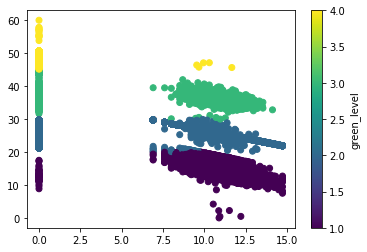

In [ ]:
plt.scatter(df2['축산업'], df2['green_score_cmp'], c=df2['Range'])
plt.colorbar(label="green_level")
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473229 entries, 0 to 473228
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   P1               473229 non-null  int64  
 1   P3               473229 non-null  int64  
 2   P4               473229 non-null  int64  
 3   P5               473229 non-null  int64  
 4   P6               473229 non-null  int64  
 5   B165             473229 non-null  int64  
 6   B166             473229 non-null  int64  
 7   C1               473229 non-null  int64  
 8   E3               473229 non-null  int64  
 9   E4               473229 non-null  int64  
 10  E5               473229 non-null  int64  
 11  E6               473229 non-null  int64  
 12  숙박업              473229 non-null  float64
 13  여행업              473229 non-null  float64
 14  세금               473229 non-null  float64
 15  잡화및쇼핑            473229 non-null  float64
 16  농수산물             473229 non-null  floa

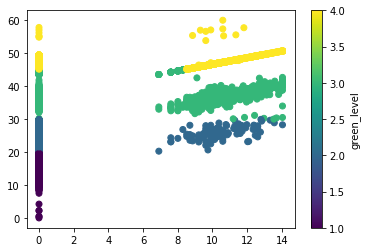

In [ ]:
plt.scatter(df2['자전거'], df2['green_score_cmp'], c=df2['Range'])
plt.colorbar(label="green_level")
plt.show()

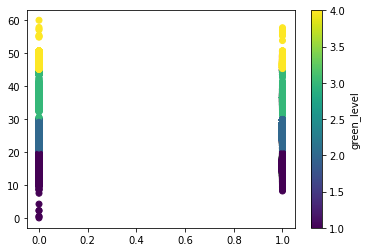

In [ ]:
plt.scatter(df2['P1'], df2['green_score_cmp'], c=df2['Range'])
plt.colorbar(label="green_level")
plt.show()

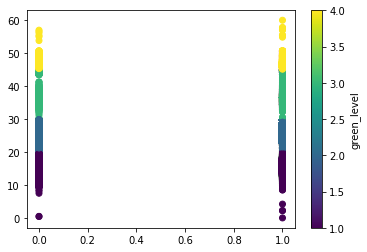

In [ ]:
plt.scatter(df2['P3'], df2['green_score_cmp'], c=df2['Range'])
plt.colorbar(label="green_level")
plt.show()

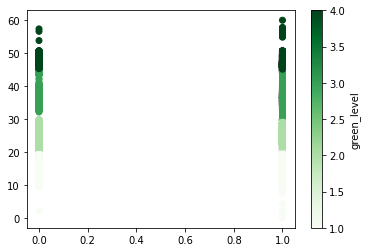

In [ ]:
plt.scatter(df2['P4'], df2['green_score_cmp'], c=df2['Range'], cmap="Greens")
plt.colorbar(label="green_level")
plt.show()

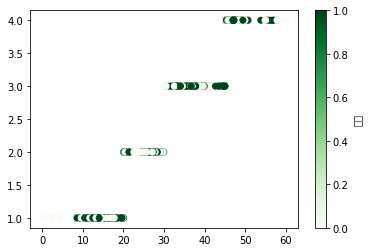

In [ ]:
plt.scatter(df2['green_score_cmp'], df2['Range'], c=df2['P1'], cmap="Greens")
plt.colorbar(label="성별")
plt.show()

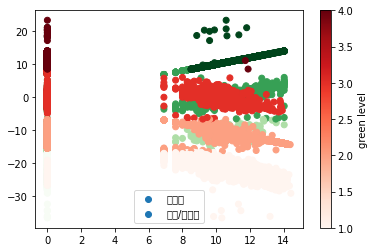

In [ ]:
plt.scatter(df2['자전거'], df2['green_score'], c=df2['Range'], cmap="Greens", label="자전거")
plt.scatter(df2['연료/가스비'], df2['green_score'], c=df2['Range'], cmap="Reds", label="연료/가스비")
plt.colorbar(label="green level")
plt.legend()
plt.show()

In [ ]:
df_original['P7'].describe()

count     473229
unique         4
top          A은행
freq      273209
Name: P7, dtype: object

In [ ]:
df_original['P7'].nunique()

4

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473229 entries, 0 to 473228
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   P1               473229 non-null  int64  
 1   P3               473229 non-null  int64  
 2   P4               473229 non-null  int64  
 3   P5               473229 non-null  int64  
 4   P6               473229 non-null  int64  
 5   B165             473229 non-null  int64  
 6   B166             473229 non-null  int64  
 7   C1               473229 non-null  int64  
 8   E3               473229 non-null  int64  
 9   E4               473229 non-null  int64  
 10  E5               473229 non-null  int64  
 11  E6               473229 non-null  int64  
 12  숙박업              473229 non-null  float64
 13  여행업              473229 non-null  float64
 14  세금               473229 non-null  float64
 15  잡화및쇼핑            473229 non-null  float64
 16  농수산물             473229 non-null  floa

In [ ]:
df_original['P7'][:10]

0    A은행
1    A은행
2    A은행
3    A은행
4    B은행
5    B은행
6    B은행
7    B은행
8    B은행
9    B은행
Name: P7, dtype: object

In [ ]:
# A은행, A 증권사, B은행, B증권사 순서대로 0, 1, 2, 3 값 부여
def cat_payment(type):
  if type == "A은행": 
    return 0
  elif type == "A증권사": 
    return 1
  elif type == "B은행": 
    return 2
  elif type == "B증권사":
    return 3
df2['결제계좌'] = df_original['P7'].apply(cat_payment)

In [ ]:
df2['결제계좌'][:10]

0    0
1    0
2    0
3    0
4    2
5    2
6    2
7    2
8    2
9    2
Name: 결제계좌, dtype: int64

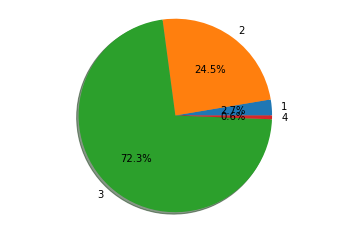

In [ ]:
# 각 결졔계좌별 green_level 비율
ratio = [0, 0, 0, 0]
for i in df2['Range']:
  ratio[i-1]+=1
labels = [1, 2, 3, 4]

plt.figsize=(20, 20)
plt.pie(ratio, labels=labels, autopct='%.1f%%', shadow=True, textprops={'size': 10})
plt.axis('equal')
plt.show()

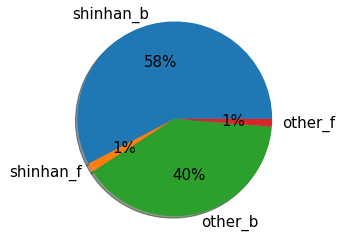

In [ ]:
# green level 3인 고객들의 결제계좌 비율
ratio = [0, 0, 0, 0]
labels = ["shinhan_b", "shinhan_f", "other_b", "other_f"]
for idx, row in df2.iterrows():
  if row['Range'] == 3:
    ratio[int(row['결제계좌'])]+=1

plt.pie(ratio, labels=labels, autopct="%1.f%%", shadow=True, textprops={'size':15})
plt.axis('equal')
plt.show()

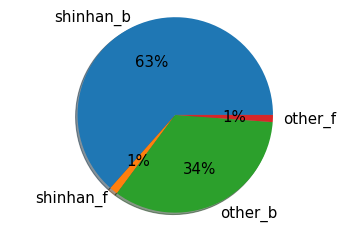

In [ ]:
# green level 4인 고객들의 결제계좌 비율
ratio = [0, 0, 0, 0]
labels = ["shinhan_b", "shinhan_f", "other_b", "other_f"]
for idx, row in df2.iterrows():
  if row['Range'] == 4:
    ratio[int(row['결제계좌'])]+=1

plt.pie(ratio, labels=labels, autopct="%1.f%%", shadow=True, textprops={'size':15})
plt.axis('equal')
plt.show()

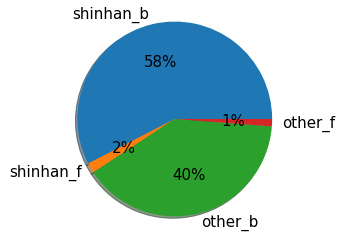

In [ ]:
# green level 2인 고객들의 결제계좌 비율
ratio = [0, 0, 0, 0]
labels = ["shinhan_b", "shinhan_f", "other_b", "other_f"]
for idx, row in df2.iterrows():
  if row['Range'] == 2:
    ratio[int(row['결제계좌'])]+=1

plt.pie(ratio, labels=labels, autopct="%1.f%%", shadow=True, textprops={'size':15})
plt.axis('equal')
plt.show()

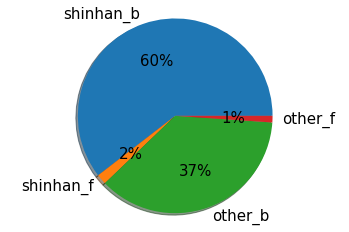

In [ ]:
# green level 1인 고객들의 결제계좌 비율
ratio = [0, 0, 0, 0]
labels = ["shinhan_b", "shinhan_f", "other_b", "other_f"]
for idx, row in df2.iterrows():
  if row['Range'] == 1:
    ratio[int(row['결제계좌'])]+=1

plt.pie(ratio, labels=labels, autopct="%1.f%%", shadow=True, textprops={'size':15})
plt.axis('equal')
plt.show()

In [ ]:
df2['Range'].describe()

count    473229.000000
mean          2.708589
std           0.521681
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: Range, dtype: float64

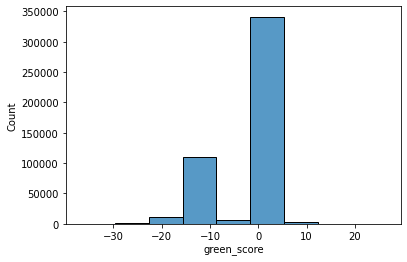

In [ ]:
sns.histplot(df2['green_score'], binwidth=7)